In [53]:
# import library yang diperlukan
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import random
import community as community_louvain


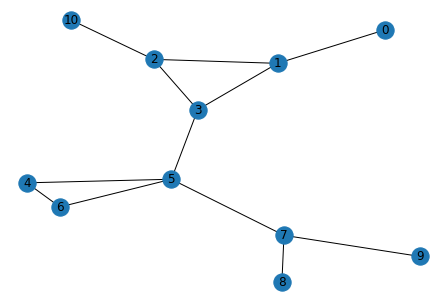

In [68]:
# partisi
G=nx.Graph()
G.add_nodes_from([0,1,2,3,4,5,6,7,8,9,10 ])
G.add_edges_from([(0,1),(2,3),(3,1),(3,5),(4,5),(4,6),(5,6),(5,7),(7,8),(7,9),(2,1),(2,10)])
nx.draw(G, with_labels=True)
partition = nx.community.kernighan_lin_bisection(G)

In [17]:
partition = nx.community.kernighan_lin_bisection(G)
partition

({0, 7, 8, 9, 10}, {1, 2, 3, 4, 5, 6})

In [28]:
# Girvan Newman 
partition2 = nx.community.girvan_newman(G)
list(partition2)

[({0, 1, 2, 3, 10}, {4, 5, 6, 7, 8, 9}),
 ({0, 1, 2, 3, 10}, {4, 5, 6}, {7, 8, 9}),
 ({0}, {1, 2, 3, 10}, {4, 5, 6}, {7, 8, 9}),
 ({0}, {1, 2, 3}, {4, 5, 6}, {7, 8, 9}, {10}),
 ({0}, {1, 2, 3}, {4, 5, 6}, {7, 9}, {8}, {10}),
 ({0}, {1}, {2, 3}, {4, 5, 6}, {7, 9}, {8}, {10}),
 ({0}, {1}, {2}, {3}, {4, 5, 6}, {7, 9}, {8}, {10}),
 ({0}, {1}, {2}, {3}, {4}, {5, 6}, {7, 9}, {8}, {10}),
 ({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7, 9}, {8}, {10}),
 ({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}, {10})]

In [30]:
# modularitas
modularity = nx.community.quality.modularity(G, partition)
modularity

0.16319444444444453

In [33]:
# maksimum modularitas
partition3 = nx.community.greedy_modularity_communities(G)
list(partition3)

[frozenset({0, 1, 2, 3, 10}), frozenset({4, 5, 6}), frozenset({7, 8, 9})]

{0: 2, 1: 2, 2: 2, 3: 2, 4: 0, 5: 0, 6: 0, 7: 1, 8: 1, 9: 1, 10: 2}

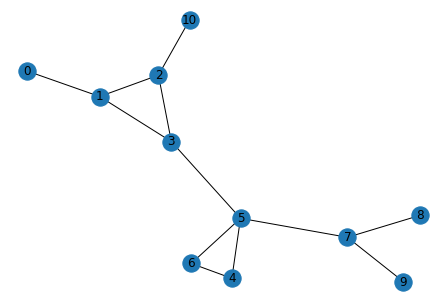

In [47]:
nx.draw(G, with_labels=True)

partition4 = community_louvain.best_partition(G)
partition4


In [46]:
community_louvain.generate_dendrogram(G)

[{0: 1, 1: 1, 2: 1, 3: 1, 4: 0, 5: 0, 6: 0, 7: 2, 8: 2, 9: 2, 10: 1}]

In [72]:
 # display a graph with its communities:
 # as Erdos-Renyi graphs don't have true community structure,
 # instead load the karate club graph

H = nx.karate_club_graph()
 # compute the best partition
partition = community_louvain.best_partition(H)

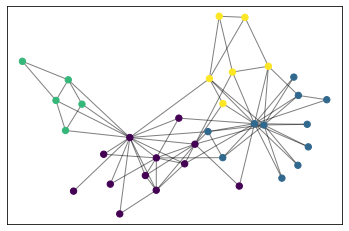

In [73]:
pos = nx.spring_layout(H)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(H, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(H, pos, alpha=0.5)
plt.show()

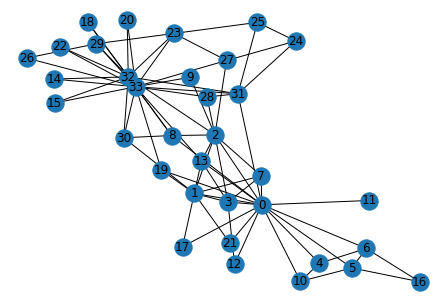

In [74]:
partition5 = nx.community.asyn_lpa_communities(H)
list(partition5)
nx.draw(H, with_labels=True)

In [71]:
list(partition5)

[]

In [76]:
sizes = [75, 75, 300]
probs = [[0.25, 0.05, 0.02], [0.05, 0.35, 0.07], [0.02, 0.07, 0.40]]
g = nx.stochastic_block_model(sizes, probs, seed=0)
len(g)

450

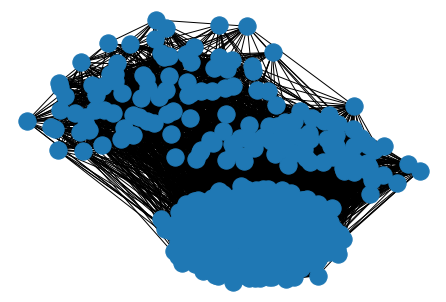

In [79]:
nx.draw(g)

In [82]:
G = nx.planted_partition_graph(4, 3, 0.5, 0.1, seed=42)

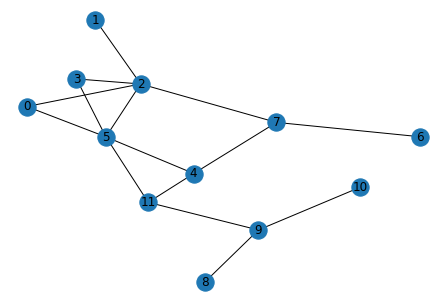

In [84]:
nx.draw(G, with_labels=True)

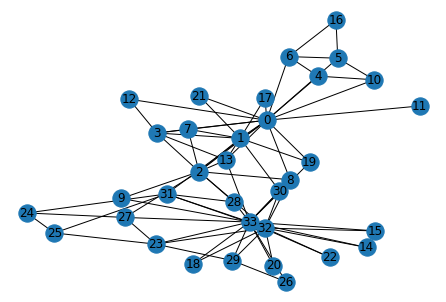

In [88]:
G = nx.karate_club_graph()
nx.draw(G, with_labels=True)